# Start the Journey of Machine Learning

I have been revising statistic for a while and I was always fasinated about making use of machine learning technique to make prediction. Today I went to udacity and go for the "Intro to Machine Learning" and really tried out the ME technique. Following is one of the example I tested out in my computer. 

## Prepare the training & testing data

The training data here about to be generated are computed by 2 factor: **grade** and **bump** which indicate the slope and roughness of road and the result is to decide whether to drive fast or slow. 

In [31]:
import random
import matplotlib 
matplotlib.use('agg')
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

%pylab inline

### This is a method to generate the data set. 
def makeTerrainData(n_points=1000):
    
    ### make 1000 toy dataset of x,y pairs
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

    ### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    # we use 75% of the data to training
    X_train = X[0:split]
    y_train = y[0:split]
    # and the rest of if the measuring the accuracy of the prediction
    X_test  = X[split:]
    y_test  = y[split:]

    return X_train, y_train, X_test, y_test

#then we fetch our prepared data
features_train, labels_train, features_test, labels_test = makeTerrainData()

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Train the machine
We are using Gaussian Naive Bayes algorithm to train our data, we can simply import the algorithm and fit our prepared training data set

In [32]:
from sklearn.naive_bayes import GaussianNB

# Then our classifier will be ready to "fit" our training data
classifier = GaussianNB().fit(features_train, labels_train)

## Visualize the decision boundary

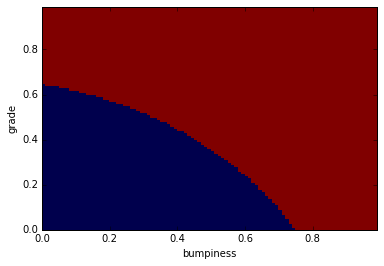

In [33]:
x_min = 0.0; x_max = 1.0
y_min = 0.0; y_max = 1.0

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)
plt.xlabel("bumpiness")
plt.ylabel("grade")

The blue area indicates that the classifier predicts to drive fast under the corresponding grade and bumpiness while red area predicts not to.

### Visualize with test points

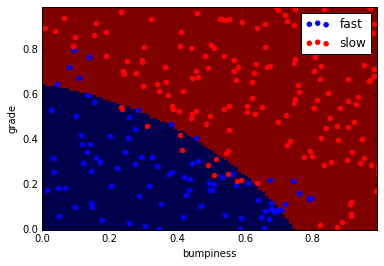

In [34]:
# Plot also the test points
grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)
plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")

We can see that some of the test points drop into the opposite area and the next step is to calculate the accuracy of the prediction.

In [35]:
from sklearn.metrics import accuracy_score

accuracy_score(labels_test, classifier.predict(features_test))

0.90000000000000002

This time the machine could reach ~90% success.

## Conclusion

The code here is based on the course provided on udacity and I modified it for better revision of the key usage of the library. During the process I found the hardest part wasn't to make use of ME but how to visualize the result. I haven't dig into data visualization much but I think I really need to take some time to drill data visualization.